# Short tutorial on descriptive statistics using Python and Pandas

This tutorial uses the Wine data set that can be downloaded from Kaggle at the following URL:

https://www.kaggle.com/zynicide/wine-reviews

The tutorial covers the following topics
- Measures of central tendancy (mean, median and mode)
- Measures of spread (range, standard deviation and variance)
- The conection between standard deviation and normal distributions
- Uniform or random distributions
- Outliers
- Data visualisations (Histograms and Boxplots)

In [33]:
# Author: Stephen Sheridan
# Import the required libraries
import pandas as pd
import pylab
import random
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy import stats

In [34]:
# Set default pylab stuff to show plots inline and set the default plot size
%matplotlib inline
pylab.rcParams['figure.figsize'] = (13.0, 5.0)
warnings.filterwarnings('ignore')

#### Load the data into a dataframe using the read_csv function and display the top rows using the head function.

In [35]:
# Load the wine data from the csv file
wine_df = pd.read_csv('data/winemag-data.csv')
# The following line can be used to drop any rows that have missing values
#wine_df.dropna(inplace=True)
# Display the top 10 rows of the  wine dataframe
wine_df.head()

,country,designation,points,price,province,region_1,taster_name,title,variety,winery
0,US,Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
1,US,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
2,Spain,Ars In Vitro,87,15.0,Northern Spain,Navarra,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
3,Italy,Belsito,87,16.0,Sicily & Sardinia,Vittoria,Kerin O’Keefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
4,France,Les Natures,87,27.0,Alsace,Alsace,Roger Voss,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


#### The describe function can tell you a lot about the numerical columns in your data set.

In [36]:
# Most of the descriptive stats discussed below can be calculated
# using one handy function in Pandas
wine_df.describe()

,points,price
count,54170.000000,54170.000000
mean,88.966550,39.209341
std,2.955188,36.154076
min,80.000000,4.000000
25%,87.000000,20.000000
50%,89.000000,30.000000
75%,91.000000,48.000000
max,100.000000,2013.000000


# What does the distribution of random data look like?
We can generate 10,000 random values between -100 and 100 and use a historgram to view the distribution of the data. As you can see, each number between -100 and 100 has approximately the same probability of occuring.

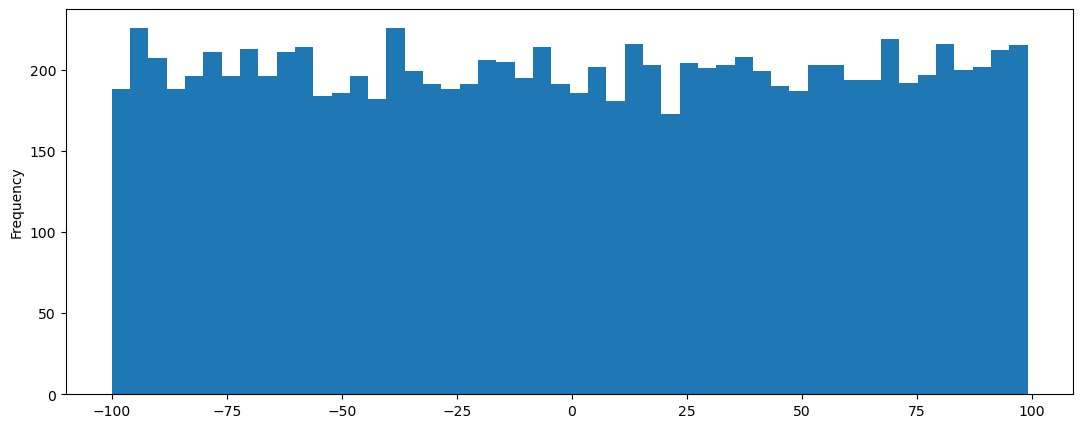

In [37]:
# Let's generate some random data and plot it using a Histogram BINS=50
random_values = np.random.randint(-100, 100, size=(10000))
# Create a Pandas dataframe from the random data
random_df = pd.DataFrame(random_values, columns=['value'])
# Plot the data using a histogram
random_df['value'].plot(kind='hist', bins=50)
plt.savefig("figs/random_hist.pdf")

# Sample of the means
If we take 1000 samples, of size 30, from the wine data set and plot the mean price for each sample we see that we get something that approximates a normal distribution with most of the data centred around the mean wine price.

This demonstrates that even when the underlying data is random, the distribution of sample means will approximate a normal distribution.

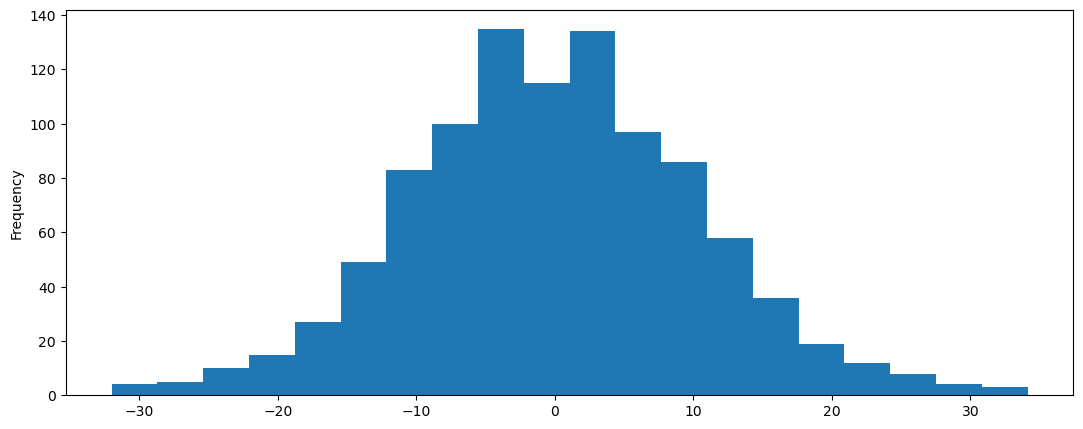

In [38]:
# Define a sample size
sample_size = 30
# Define the number of sample we require
number_of_samples = 1000
# Create an empty list for the sample means
random_means = []
# Loop around number_of_samples times
for i in range(number_of_samples):
    # Grab a random sample of size 30 from the random data
    random_sample = random_df.sample(n=sample_size)
    # Calculate the mean of the sample and add it to the list
    random_means.append(random_sample['value'].mean())

# Create a pandas dataframe from the sample means list
random_means_df = pd.DataFrame(random_means, columns=['value'])
# Plot the data using a histogram
random_means_df['value'].plot(kind='hist', bins=20)
plt.savefig("figs/sample_means_random_hist.pdf")

# Replicating this process for the wine data set
When take a sample of data from the wine data set and plot the price column using a histogram we see that the distribution does not look like a normal distribution. Values like **price** are not normally distributed.

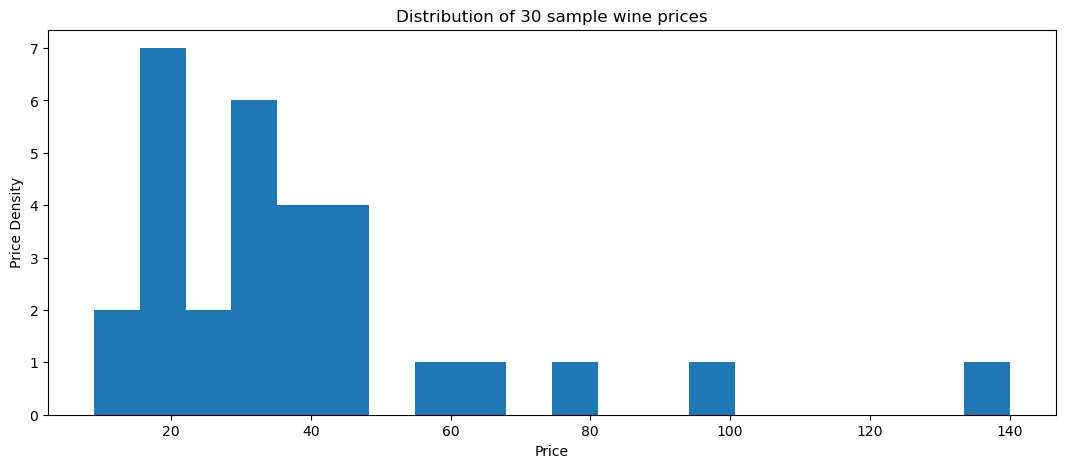

In [39]:
# Define the sample size
sample_size = 30
# Grab the random sample for the dataframe
wine_sample = wine_df.sample(n=sample_size)
# Plot the price column data using a histogram
ax = wine_sample['price'].plot(kind='hist', bins=20)
ax.set_title("Distribution of " + str(sample_size) + " sample wine prices")
ax.set_ylabel('Price Density')
ax.set_xlabel('Price')
plt.savefig("figs/sample_wine_prices.pdf")

# Sample of the means for the wine data set (price)
The sample of the mean prices for the wine data will approximate a normal distribution centered around the mean price of the population.


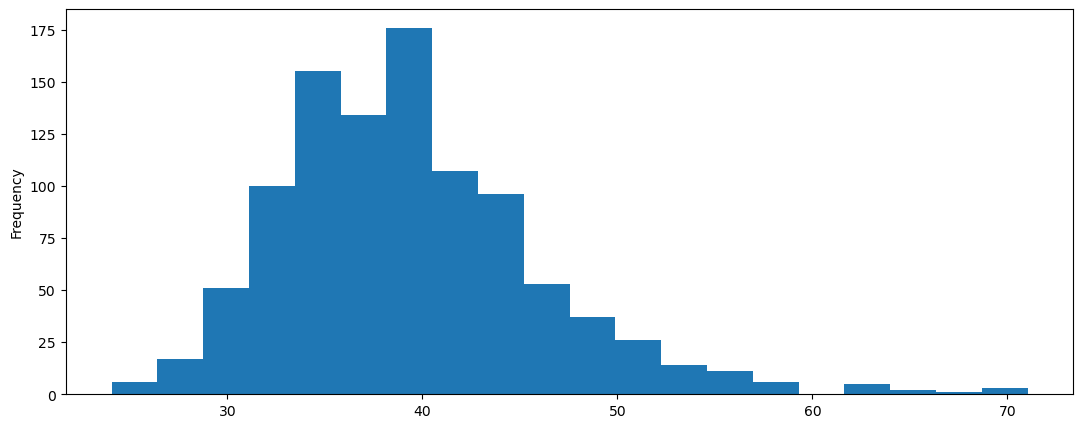

In [40]:
# Define the sample size
sample_size = 30
# Define the required number of samples
number_of_samples = 1000
# Create an empty list for the sample means
sample_means = []
# Loop around number_of_samples times
for i in range(number_of_samples):
    # Grab a random sample of size 30 from the wine data set
    wine_sample = wine_df.sample(n=sample_size)
    # Calculate the mean price of the sample and add it to the list
    sample_means.append(wine_sample['price'].mean())

# Create a pandas dataframe from the sample means list
sampled_prices = pd.DataFrame(sample_means, columns=['value'])
# Plot the data using a histogram
sampled_prices['value'].plot(kind='hist', bins=20)
plt.savefig("figs/sample_means_price.pdf")

# One Sample t-test in Python
A one sample t-test is used to test whether or not the mean of a population is equal to some value.

In [41]:
#define data
data = [300, 315, 320, 311, 314, 309, 300, 308, 305, 303, 305, 301, 303]

#perform one sample t-test
result = stats.ttest_1samp(a=data, popmean=310)
print("p-value = " ,result[1])

p-value =  0.1389944275158753


The two hypotheses for this particular one sample t-test are as follows:

* H0: µ = 310 (the mean weight for this sample is 310)
* HA: µ ≠310 (the mean is not 310)

Because the p-value of our test (0.1389) is greater than alpha = 0.05, we fail to reject the null hypothesis of the test.

We do not have sufficient evidence to say that the mean is different from 310.

# Two Sample t-test in Python
A two sample t-test is used to test whether or not the means of two populations are equal.

In [42]:
#define data
sample1 = [300, 315, 320, 311, 314, 309, 300, 308, 305, 303, 305, 301, 303]
sample2 = [335, 329, 322, 321, 324, 319, 304, 308, 305, 311, 307, 300, 305]

#perform two sample t-test
result = stats.ttest_ind(a=sample1, b=sample2) 
print("p-value = " ,result[1])

p-value =  0.04633501389516516


The two hypotheses for this particular two sample t-test are as follows:

* H0: µ1 = µ2 (the mean of the two samples is equal)
* HA: µ1 ≠ µ2 (the mean of the two samples is not equal)

Since the p-value of the test (0.0463) is less than .05, we reject the null hypothesis.

This means we have sufficient evidence to say that the means of the two sampels are not equal.


# Paired Samples t-test in Python
A paired samples t-test is used to compare the means of two samples when each observation in one sample can be paired with an observation in the other sample.

For example, suppose we want to know whether or not a certain training program is able to increase the max vertical jump (in inches) of basketball players.

To test this, we may recruit a simple random sample of 12 basketball players and measure each of their max vertical jumps. Then, we may have each player use the training program for one month and then measure their max vertical jump again at the end of the month.

The following data shows the max jump height (in inches) before and after using the training program for each player:

Before: 22, 24, 20, 19, 19, 20, 22, 25, 24, 23, 22, 21

After: 23, 25, 20, 24, 18, 22, 23, 28, 24, 25, 24, 20

In [43]:
#define before and after max jump heights
before = [22, 24, 20, 19, 19, 20, 22, 25, 24, 23, 22, 21]
after = [23, 25, 20, 24, 18, 22, 23, 28, 24, 25, 24, 20]

#perform paired samples t-test
result = stats.ttest_rel(a=before, b=after)
print("p-value = " ,result[1])

p-value =  0.02802807458682508


The two hypotheses for this particular paired samples t-test are as follows:

* H0: µ1 = µ2 (the mean jump height before and after using the program is equal)
* HA: µ1 ≠ µ2 (the mean jump height before and after using the program is not equal)

Since the p-value of the test (0.0280) is less than .05, we reject the null hypothesis.

This means we have sufficient evidence to say that the mean jump height before and after using the training program is not equal.

# Apply some stats tests to the Wine data set

First, let's check to see if the mean of some sample prices is in line with the population mean

* H0: µ1 = µ2 (the mean of the sample is in line with the mean of the population)
* HA: µ1 ≠ µ2 (the mean of the sample is NOT in line with the mean of the population)

In [44]:
# Hypothesis
print("Sample of 30 random points has mean in line with population mean")
# Population 
pop_mean =  wine_df['points'].mean()
print("Population mean points " + str(pop_mean))

# Random sample of 30 wines
sample_mean = wine_sample['points'].mean()
print("Sample mean points " + str(sample_mean))

# Test to see if the mean of the sample is agree

# Test against the population mean - one sample t-test
results =  stats.ttest_1samp(wine_sample['points'], pop_mean)

# Compare the two samples - two sample t-test
#results =  stats.ttest_ind(wine_sample['points'], wine_df['points'])

print("P-value = %.6f" % results[1])
print("Accept NULL hypothesis if p-value > Alpha of 0.5")
print("Otherwise reject the NULL hypothesis and accept the alternative")

Sample of 30 random points has mean in line with population mean
Population mean points 88.96654975078457
Sample mean points 88.96666666666667
P-value = 0.999806
Accept NULL hypothesis if p-value > Alpha of 0.5
Otherwise reject the NULL hypothesis and accept the alternative


# We can check to see if the mean of a sample is in line with some arbitrary mean value. Let's say 50.
* H0: µ1 = µ2 (the mean of the sample is 50)
* HA: µ1 ≠ µ2 (the mean of the sample is NOT 50)

In [45]:
# Hypothesis

# Random sample of 30 wines
sample_mean = wine_sample['points'].mean()
print("Sample mean points " + str(sample_mean))

# Test to see if the mean of the sample is agree
results =  stats.ttest_1samp(wine_sample['points'], 50)

print("P-value = %.6f" % results[1])
print("Accept NULL hypothesis if p-value > Alpha of 0.5")
print("Otherwise reject the NULL hypothesis and accept the alternative")

Sample mean points 88.96666666666667
P-value = 0.000000
Accept NULL hypothesis if p-value > Alpha of 0.5
Otherwise reject the NULL hypothesis and accept the alternative
